# **Pruebas de Dependencia Espacial**

In [53]:
# Iportamos las librerias necesaria:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix

# Estadístico de Mantel

La siguiente función calcula la estadística de Mantel. Tiene como parámetros:

* df: El dataframe de datos, con las cordenadas en cada columna y una variable objetivo
* target_var: El nombre de la columna de la variable objetivo

In [54]:
def mantel(df, target_var):
    """
    La siguiente función calcula la estadística de Mantel. Tiene como parámetros:
    * df: El dataframe de datos, con las coordenadas en cada columna y una variable objetivo
    * target_var: El nombre de la columna de la variable objetivo
    """
    coords = df.drop(target_var, axis=1).values  # Coordenadas de los individuos
    target_values = df[target_var].values        # Valores de la variable objetivo
    
    # Calcular la matriz de distancias euclidianas entre las coordenadas
    dist_matrix = distance_matrix(coords, coords)
    
    # Calcular la matriz de diferencias de valores entre los individuos
    diff_values = np.abs(target_values[:, None] - target_values[None, :])**2
    
    # Calcular la estadística de Mantel
    M = np.sum(dist_matrix * diff_values)
    
    return M


Por ejemplo, si construimos el siguiente dataframe:

In [55]:
n = 300     # Número de individuos 

x = np.random.rand(n)           # Coordenada x
y = np.random.rand(n)           # Coordenada y
z = np.random.rand(n)           # Coordenada z
objetivo = np.random.rand(n)*10    # Variable objetivo

# Puedes ser con n coordenadas (x,y,z,...) para n >= 1.

df = pd.DataFrame({"x":x, "y":y, "z":z, "objetivo":objetivo})

Enotnces podemos calcular la estadística de Mantel de la siguiente manera:

In [56]:
mantel(df=df, target_var="objetivo")

918561.8063176505

# Prueba de Mantel con Bootstrap (Montecarlo)

In [57]:
# Por el momento devuelve el vector del histograma
def mantel_montecarlo(df, target_var, k=20, N=200):
    H = []
    for i in range(N):
        muestra_coor = df.drop(target_var, axis=1).sample(n=k, replace=False).reset_index(drop=True)
        muestra_target = df[target_var].sample(n=k, replace=False).reset_index(drop=True)
        H.append(mantel(pd.concat([muestra_coor, muestra_target], axis=1), target_var))
    
    return H

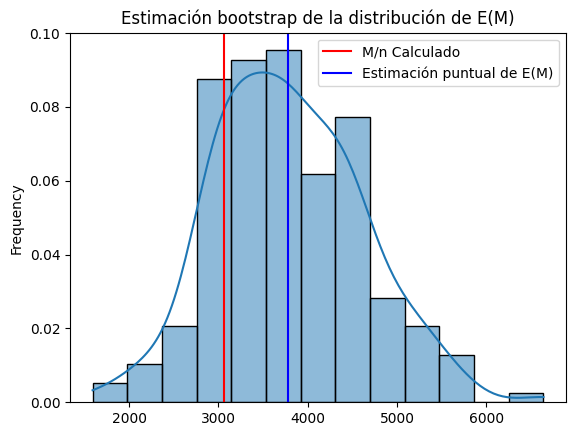

0.81


In [58]:
prueba = mantel_montecarlo(df, "objetivo")
p=mantel(df, "objetivo")/len(df)            # Calculado

sns.histplot(prueba, kde=True, stat="frequency")
plt.axvline(p, color="red", label="M/n Calculado")
plt.axvline(np.mean(prueba),color="Blue", label="Estimación puntual de E(M)")
plt.title("Estimación bootstrap de la distribución de E(M)")
plt.legend()
plt.show()
print(np.mean([i > p for i in prueba]))